# **Step 1: Import Libraries**

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Models
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

 # **Step 2: Load Dataset**

In [3]:
train = pd.read_csv("/kaggle/input/datasets/durgeshchungle/titanic/Titanic_train.csv")
test = pd.read_csv("/kaggle/input/datasets/durgeshchungle/titanic/Titanic_test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Exploratory Data Analysis (EDA)**

##  **2.1 Dataset Info & Missing Values**

In [4]:
print(train.info())
print("\nMissing Values:\n", train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked    

## **2.2 Data Distribution (Histograms)**

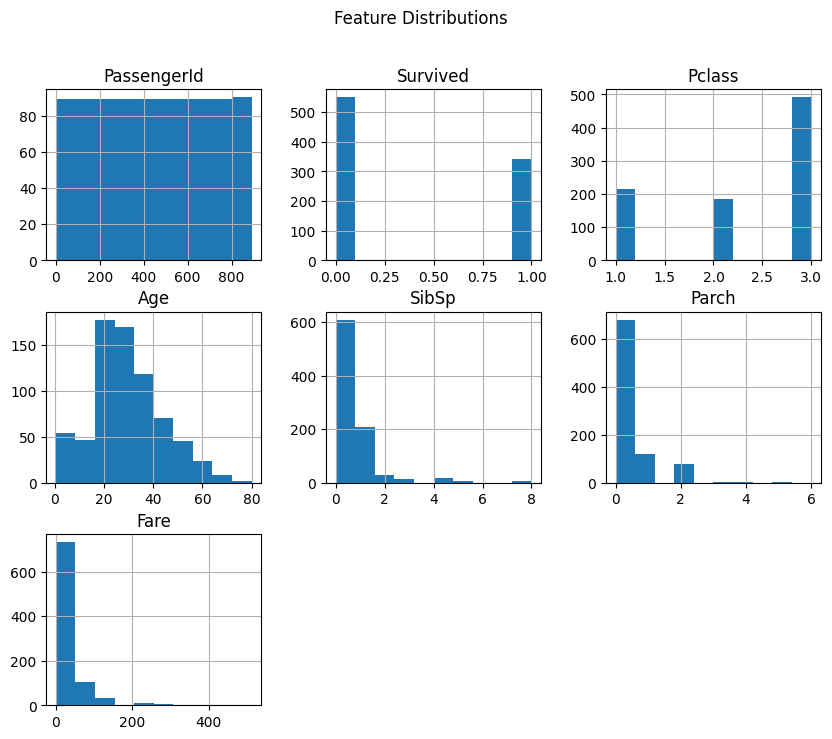

In [5]:
train.hist(figsize=(10,8))
plt.suptitle("Feature Distributions")
plt.show()

## **2.3 Boxplots for Outliers**

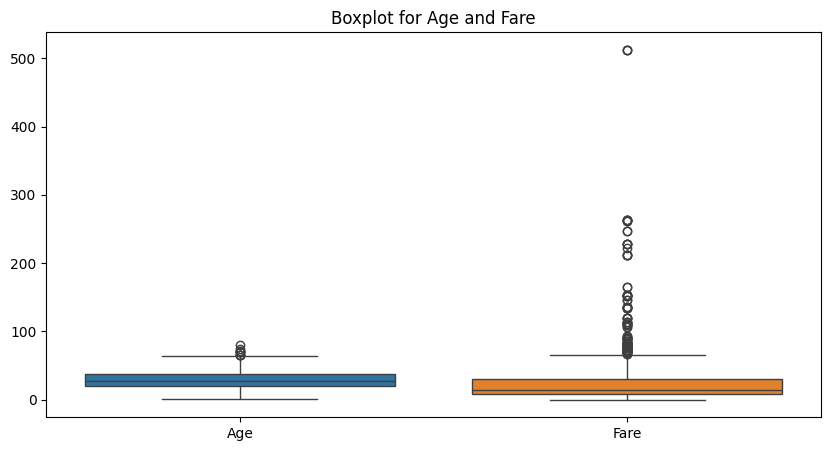

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train[['Age','Fare']])
plt.title("Boxplot for Age and Fare")
plt.show()

## **2.4 Survival Count**

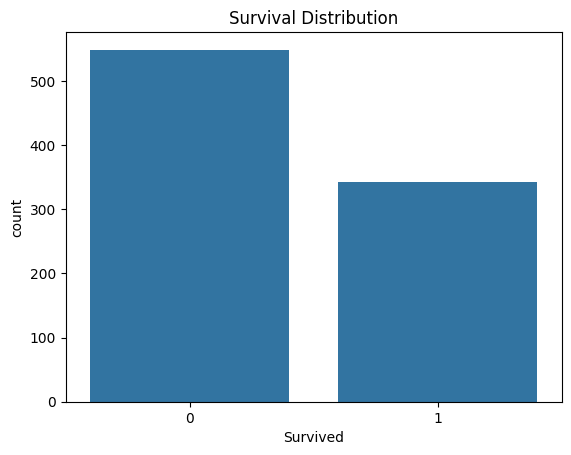

In [7]:
sns.countplot(x='Survived', data=train)
plt.title("Survival Distribution")
plt.show()

## **2.5 Survival vs Gender**

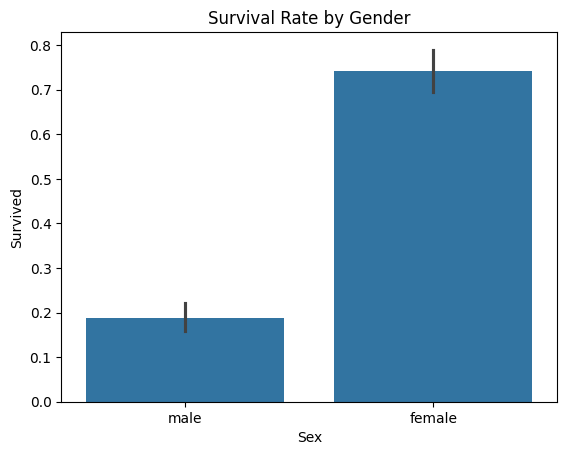

In [8]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.title("Survival Rate by Gender")
plt.show()

## **2.6 Survival vs Passenger Class**

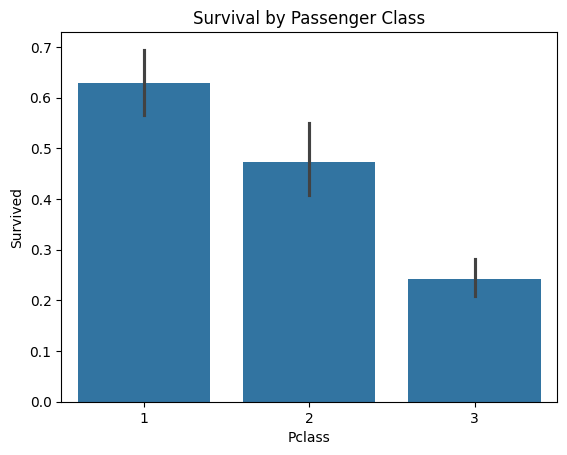

In [9]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title("Survival by Passenger Class")
plt.show()

## **2.7 Age vs Fare Scatter Plot**

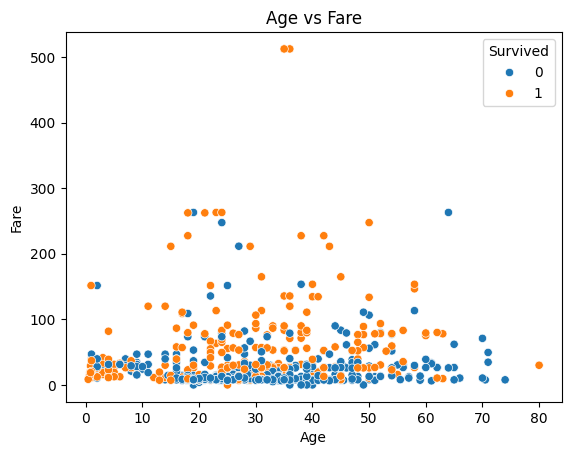

In [10]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train)
plt.title("Age vs Fare")
plt.show()

# **Step 3: Data Preprocessing**

## **3.1 Handle Missing Value**

In [ ]:
# Fill Age with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill Embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# Fill Fare in test
test['Fare'].fillna(test['Fare'].median(), inplace=True)

## **3.2 Drop Irrelevant Features**

In [12]:
train.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
test_ids = test['PassengerId']
test.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

## **3.3 Encode Categorical Variables**

In [13]:
le = LabelEncoder()

for col in ['Sex','Embarked']:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# **Step 4: Train-Test Split**

In [15]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **Step 5: Evaluation Function**

In [17]:
def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))

# **Step 6: LightGBM Model**

In [ ]:
lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)

print("LightGBM Performance")
evaluate_model(lgbm, X_test, y_test)

# **step7: XGBoost Model**

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb.fit(X_train, y_train)

print("XGBoost Performance")
evaluate_model(xgb, X_test, y_test)

# **Step 8: Cross Validation**

In [ ]:
lgbm_cv = cross_val_score(lgbm, X, y, cv=5)
xgb_cv = cross_val_score(xgb, X, y, cv=5)

print("LightGBM CV Accuracy:", lgbm_cv.mean())
print("XGBoost CV Accuracy:", xgb_cv.mean())

# **Step 9: Hyperparameter Tuning**

## **LightGBM Tuning**

In [ ]:
param_grid = {
    'num_leaves':[20,31,50],
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':[100,200]
}

grid_lgb = GridSearchCV(LGBMClassifier(), param_grid, cv=3)
grid_lgb.fit(X_train, y_train)

print("Best LGBM Params:", grid_lgb.best_params_)

## **XGBoost Tuning**

In [24]:
param_grid_xgb = {
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1],
    'n_estimators':[100,200]
}

grid_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid_xgb, cv=3)
grid_xgb.fit(X_train, y_train)

print("Best XGB Params:", grid_xgb.best_params_)

Best XGB Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


# **Step 10: Model CompaArison Visualization**

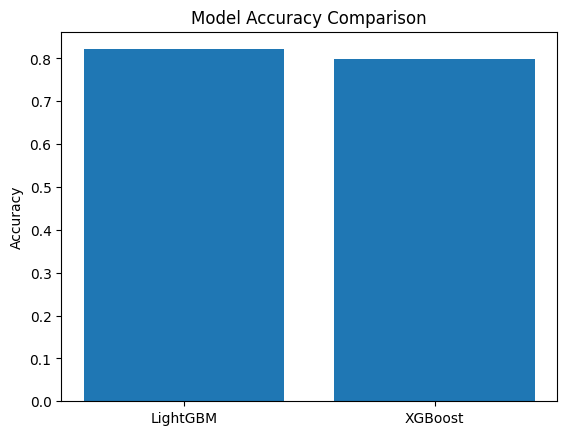

In [25]:
models = ['LightGBM', 'XGBoost']
accuracy = [
    accuracy_score(y_test, lgbm.predict(X_test)),
    accuracy_score(y_test, xgb.predict(X_test))
]

plt.bar(models, accuracy)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# **Comparative Analysis Report: LightGBM vs XGBoost on Titanic Dataset-:**
## **Introduction -:** 
**This study compares the performance of LightGBM and XGBoost using the Titanic dataset to predict passenger survival. Both algorithms are gradient boosting techniques widely used for classification problems due to their high accuracy and efficiency.**

## **Performance Comparison-:**

### **Both models demonstrated strong predictive performance.**

LightGBM achieved slightly higher accuracy and precision, indicating fewer false positive predictions.

XGBoost showed marginally higher recall, meaning it correctly identified slightly more survivors.

The F1-score of both models was nearly identical, suggesting a balanced performance between precision and recall.

Overall, the performance difference between the two models was small, and both achieved accuracy above 80%, indicating reliable prediction capability.

# **Strengths and Limitations**
## **LightGBM**

### **Strengths**

Faster training speed

Efficient memory usage

High accuracy

### **Limitations**

Can overfit small datasets if not tuned

Sensitive to noisy data

## **XGBoost**

### **Strengths**

Strong regularization reduces overfitting

Stable and robust performance

Effective handling of complex relationships

### **Limitations**

Slower training time

Higher computational cost